# Wavewire issue with preferred values

I processed wave-wire data from five different experiments:

* 2019-11-21, wind only, 3 blue wave wires (before Neil's tank-sized wave wire install)
* 2019-12-03, wind only, 3 blue wave wires (before Neil's tank-sized wave wire install)
* 2020-11-06, wind only, 3 blue wave wires (columns 1, 3, 4) + 1 black wave wire (column 2)
* 2020-11-18, wind only, 3 blue wave wires (columns 1, 2, 3) + 1 black wave wire (column 4)
* 2020-11-18, wind + paddle (JONSWAP), 3 blue wave wires (columns 1, 2, 3) + 1 black wave wire (column 4)

I plotted both the raw time series in thin line where preferred values appear at places as "cut-off" in the crests and troughs.

I also plotted distributions of elevation using 5 mm bin size.

## Takeaways

* The issue appears in both 2019 and 2020 data
* The distributions show that the black wave wire may perform better than blue wires, but also has issues as waves increase in height
* There are between one and a few preferred values in each distribution
* The issue doesn't seem related to wind. It shows up clearly in JONSWAP paddle waves and Fan = 0 Hz.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)

## Load data

In [2]:
ds1 = xr.open_dataset('sustain_drag_20191121.nc')
ds2 = xr.open_dataset('sustain_drag_20191203.nc')
ds3 = xr.open_dataset('sustain_drag_20201106.nc')
ds4 = xr.open_dataset('sustain_drag_20201118.nc')
ds5 = xr.open_dataset('sustain_drag_20201118_jonswap.nc')

# Raw time series

## 2019-11-21

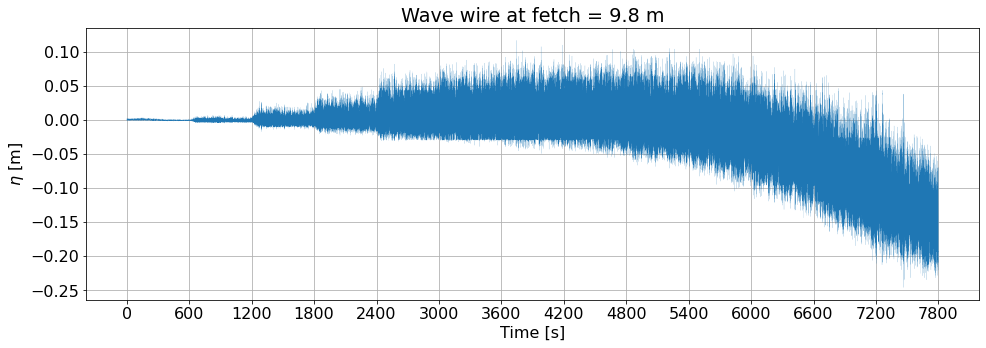

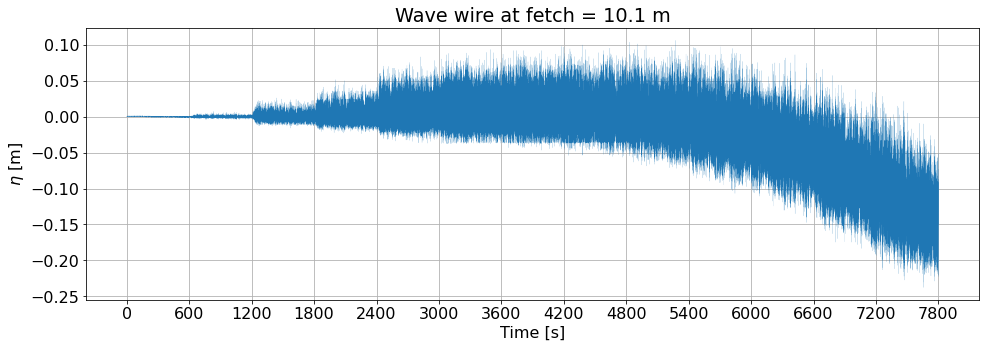

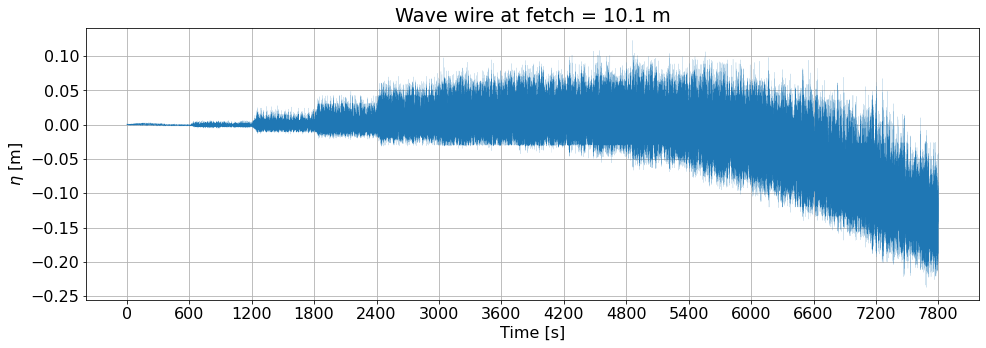

In [3]:
ds = ds1
num_wires = ds.eta_w.shape[0]
for n in range(num_wires):
    fig = plt.figure(figsize=(16, 5))
    plt.plot(ds.time, ds.eta_w[n,:], lw=0.1)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\eta$ [m]')
    plt.xticks(range(0, int(ds.time.max()) + 600, 600))
    plt.grid()
    plt.title('Wave wire at fetch = %.1f m' % ds.fetch_wavewire[n])

## 2019-12-03

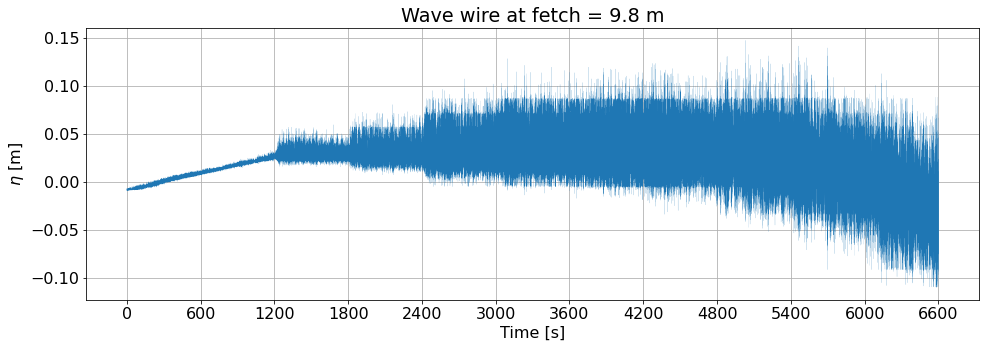

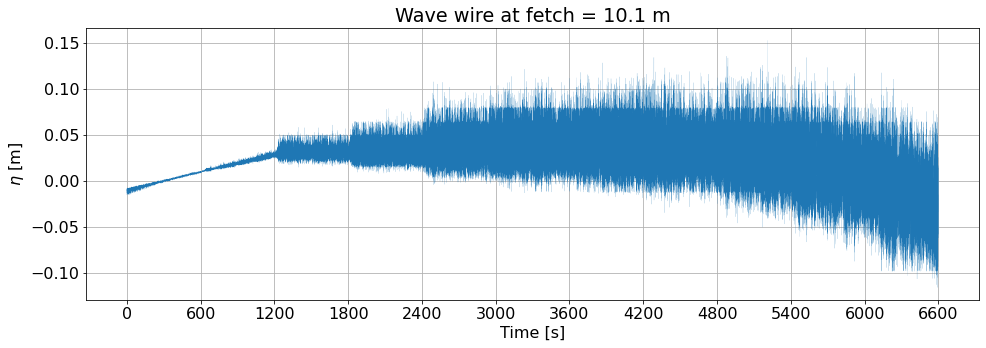

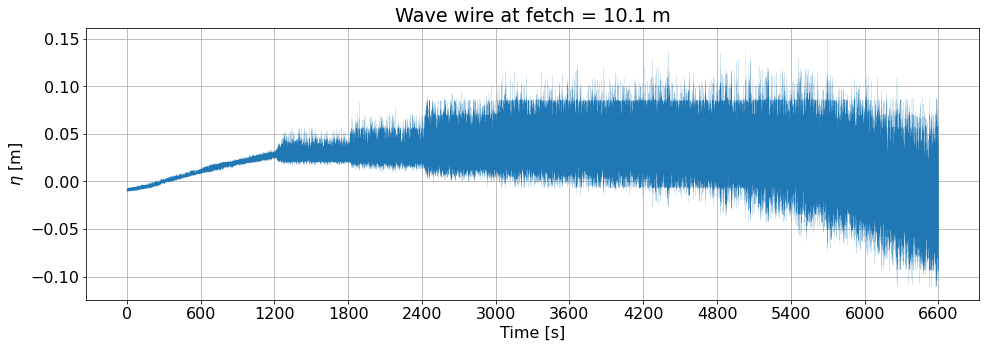

In [4]:
ds = ds2
num_wires = ds.eta_w.shape[0]
for n in range(num_wires):
    fig = plt.figure(figsize=(16, 5))
    plt.plot(ds.time, ds.eta_w[n,:], lw=0.1)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\eta$ [m]')
    plt.xticks(range(0, int(ds.time.max()) + 600, 600))
    plt.grid()
    plt.title('Wave wire at fetch = %.1f m' % ds.fetch_wavewire[n])

## 2020-11-06

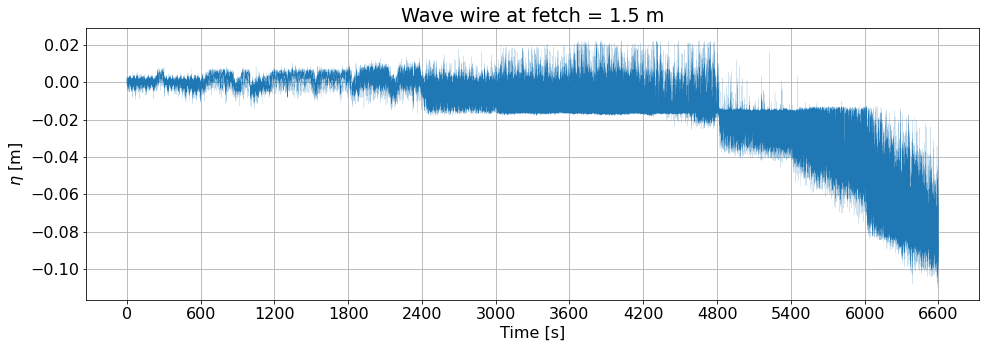

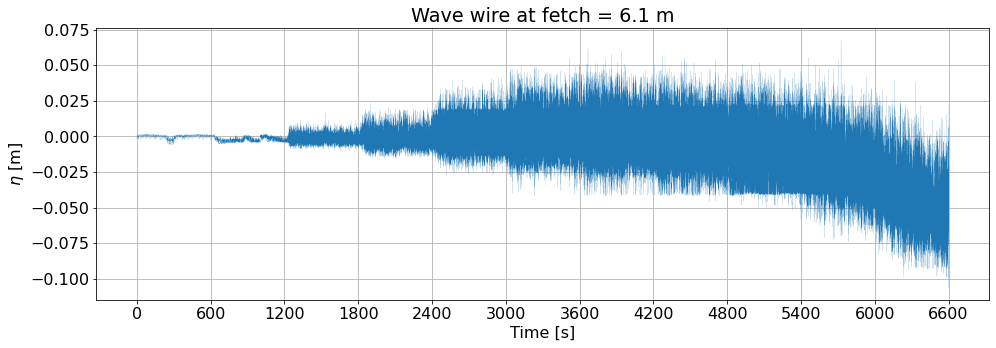

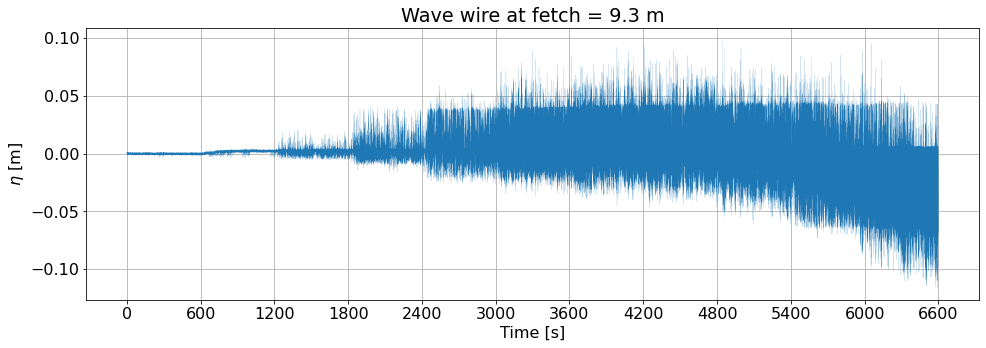

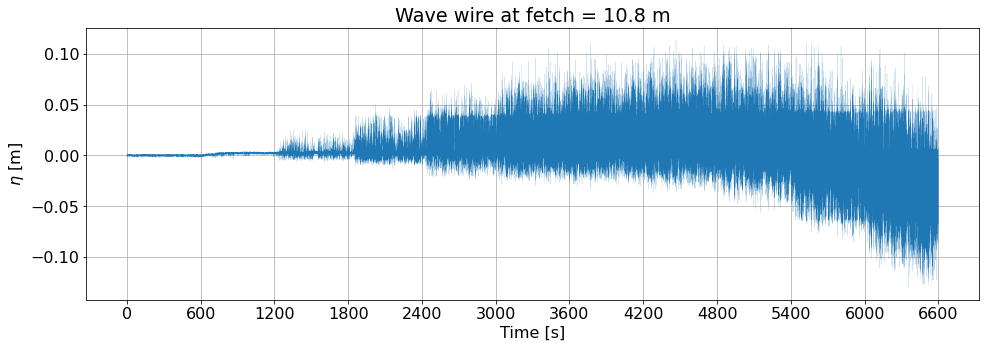

In [5]:
ds = ds3
num_wires = ds.eta_w.shape[0]
for n in range(num_wires):
    fig = plt.figure(figsize=(16, 5))
    plt.plot(ds.time, ds.eta_w[n,:], lw=0.1)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\eta$ [m]')
    plt.xticks(range(0, int(ds.time.max()) + 600, 600))
    plt.grid()
    plt.title('Wave wire at fetch = %.1f m' % ds.fetch_wavewire[n])

## 2020-11-18

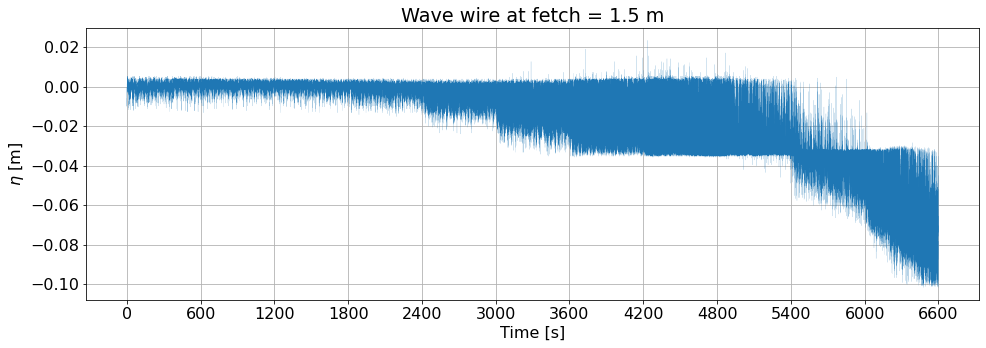

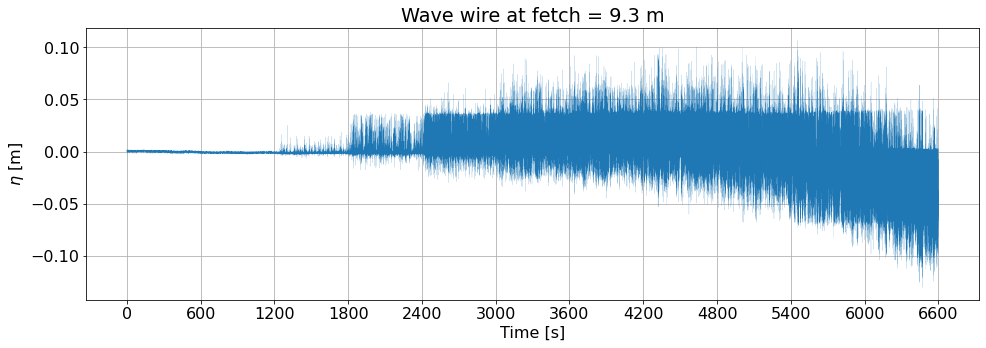

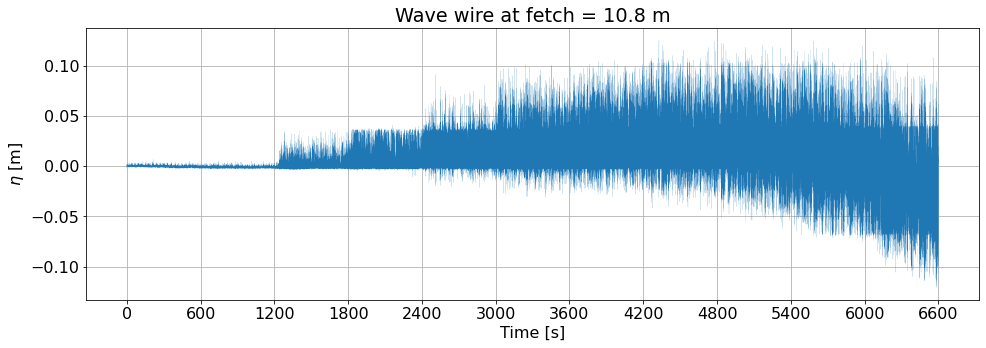

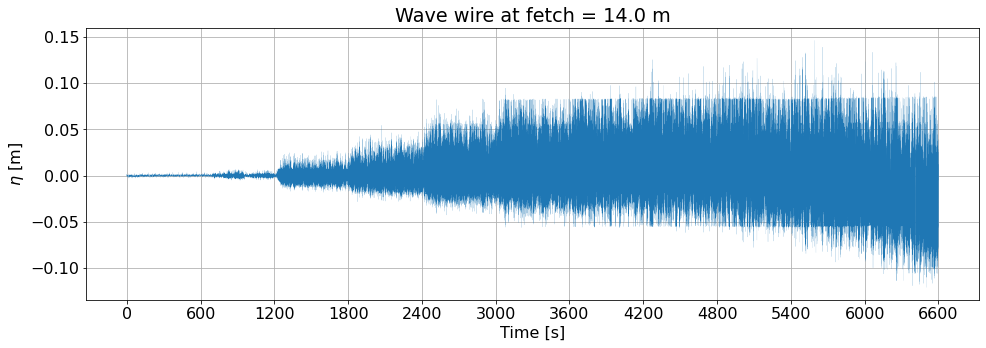

In [6]:
ds = ds4
num_wires = ds.eta_w.shape[0]
for n in range(num_wires):
    fig = plt.figure(figsize=(16, 5))
    plt.plot(ds.time, ds.eta_w[n,:], lw=0.1)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\eta$ [m]')
    plt.xticks(range(0, int(ds.time.max()) + 600, 600))
    plt.grid()
    plt.title('Wave wire at fetch = %.1f m' % ds.fetch_wavewire[n])

## 2020-11-18, JONSWAP paddle waves (Tp = 1 s, Hs = 0.1 m)

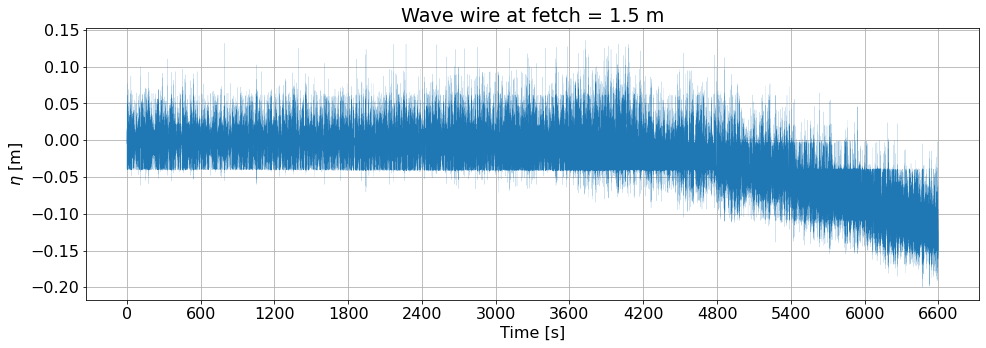

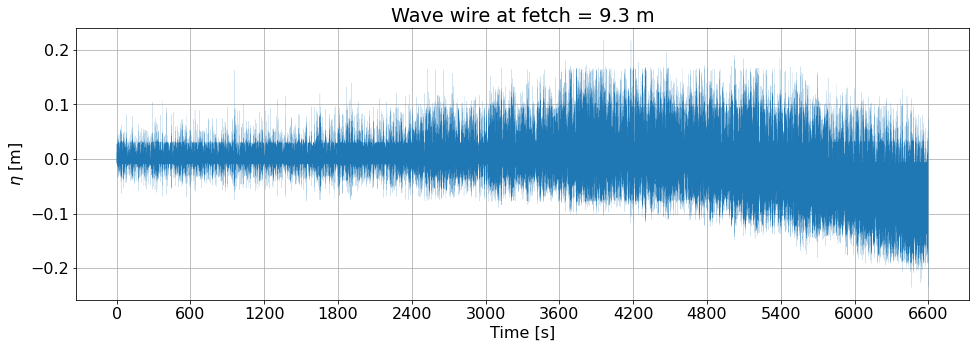

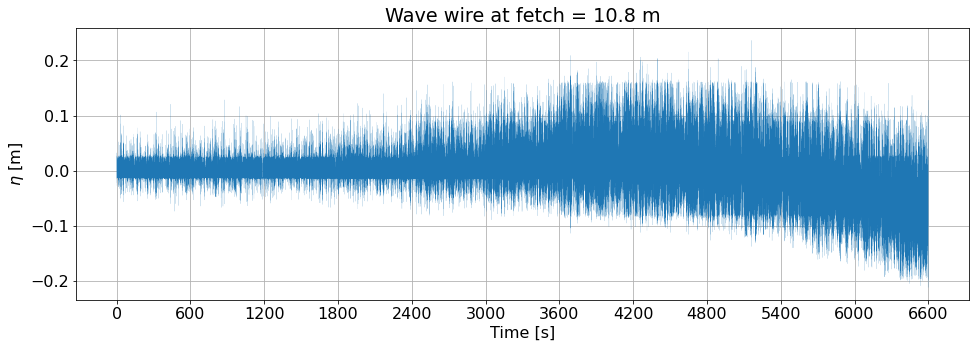

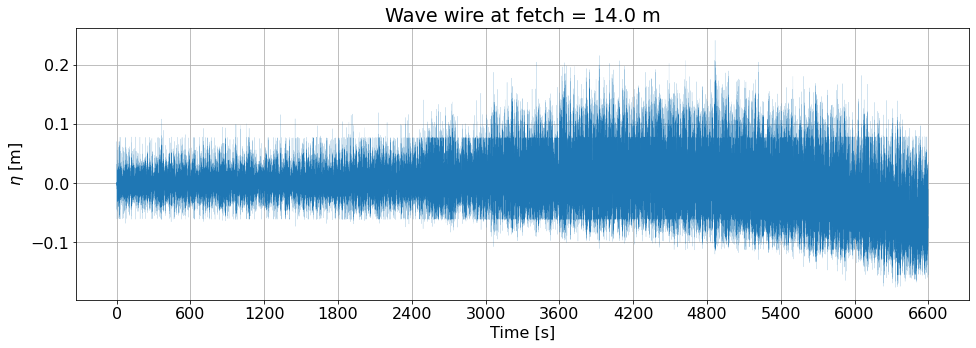

In [7]:
ds = ds5
num_wires = ds.eta_w.shape[0]
for n in range(num_wires):
    fig = plt.figure(figsize=(16, 5))
    plt.plot(ds.time, ds.eta_w[n,:], lw=0.1)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\eta$ [m]')
    plt.xticks(range(0, int(ds.time.max()) + 600, 600))
    plt.grid()
    plt.title('Wave wire at fetch = %.1f m' % ds.fetch_wavewire[n])

# Distributions

## 2019-11-21

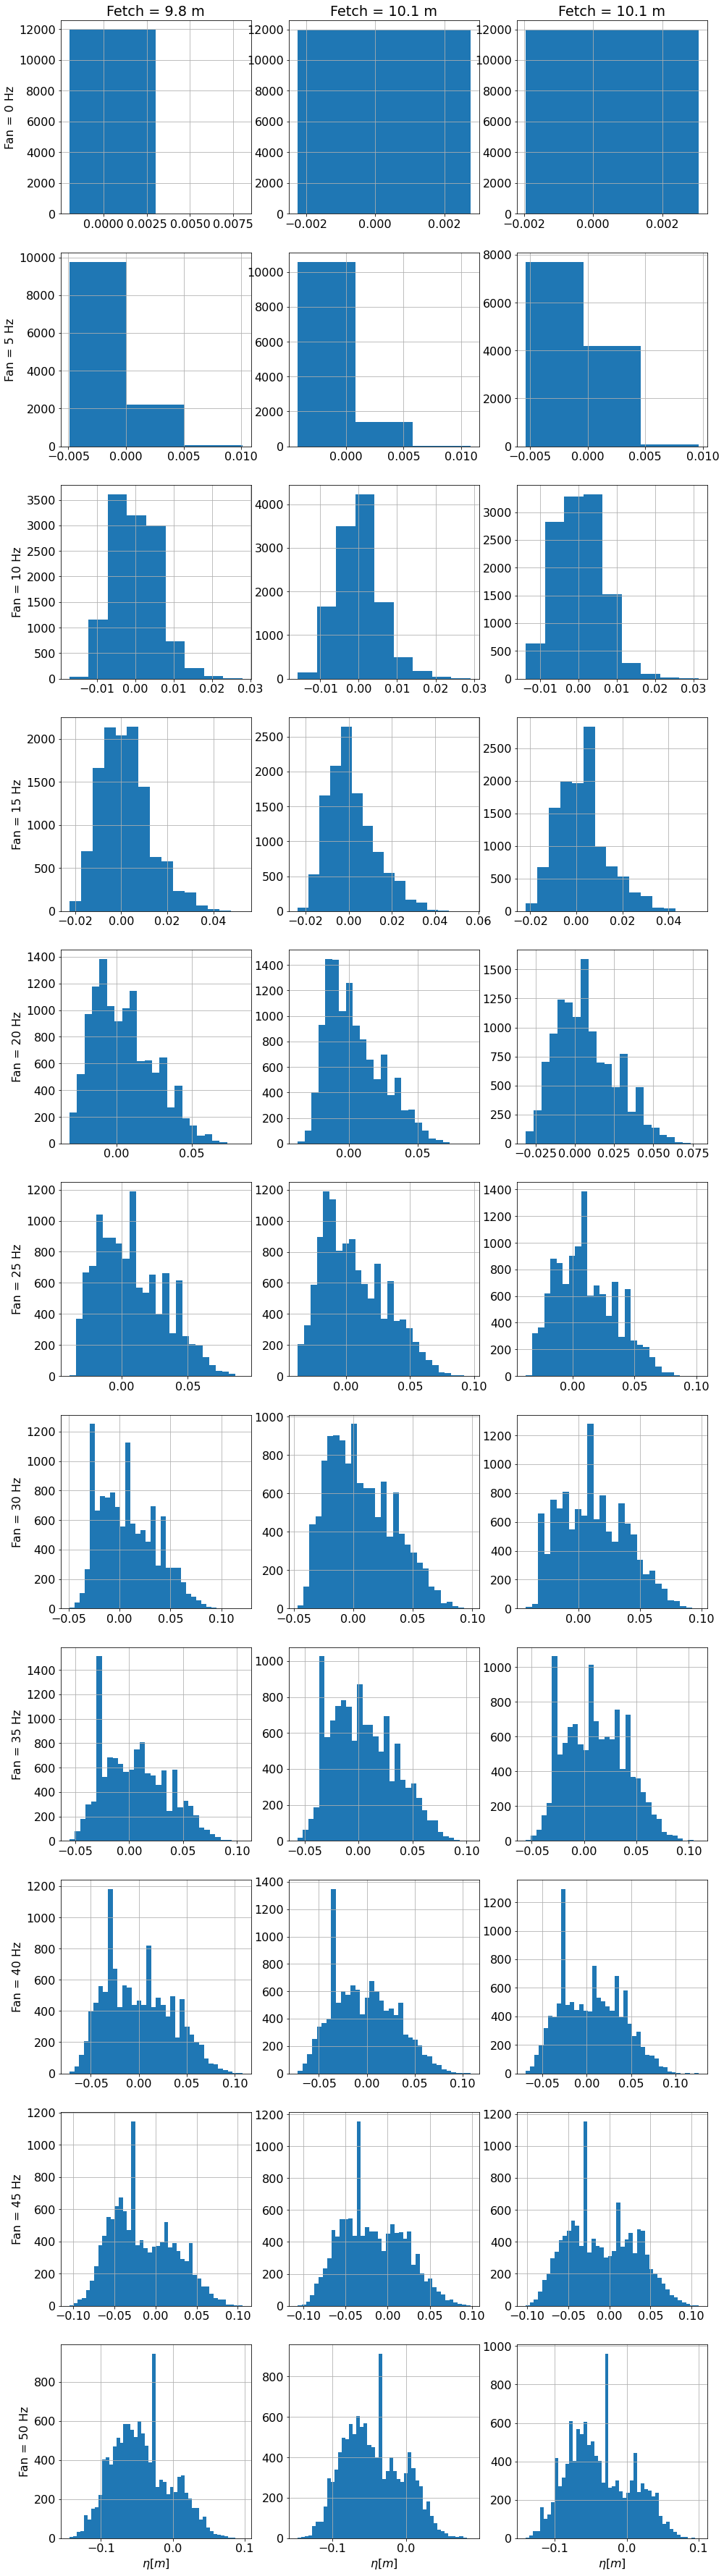

In [8]:
fan = np.arange(0, 55, 5)
num_runs = fan.size

ds = ds1
num_wires = ds.eta_w.shape[0]

fig = plt.figure(figsize=(16, 64))

for n, f in enumerate(fan):
    mask = ds.fan == f
    for i in range(num_wires):
        ax = plt.subplot2grid((num_runs, num_wires), (n, i))
        e = ds.eta_w[i,mask]
        bins = np.arange(np.min(e), np.max(e) + 5e-3, 5e-3)
        ax.hist(e, bins)
        ax.grid()
        if n == 0:
            ax.set_title('Fetch = %.1f m' % ds.fetch_wavewire[i])
        if i == 0:
            ax.set_ylabel('Fan = %i Hz' % f)
        if n == num_runs - 1:
            ax.set_xlabel(r'$\eta [m]$')

## 2019-12-03

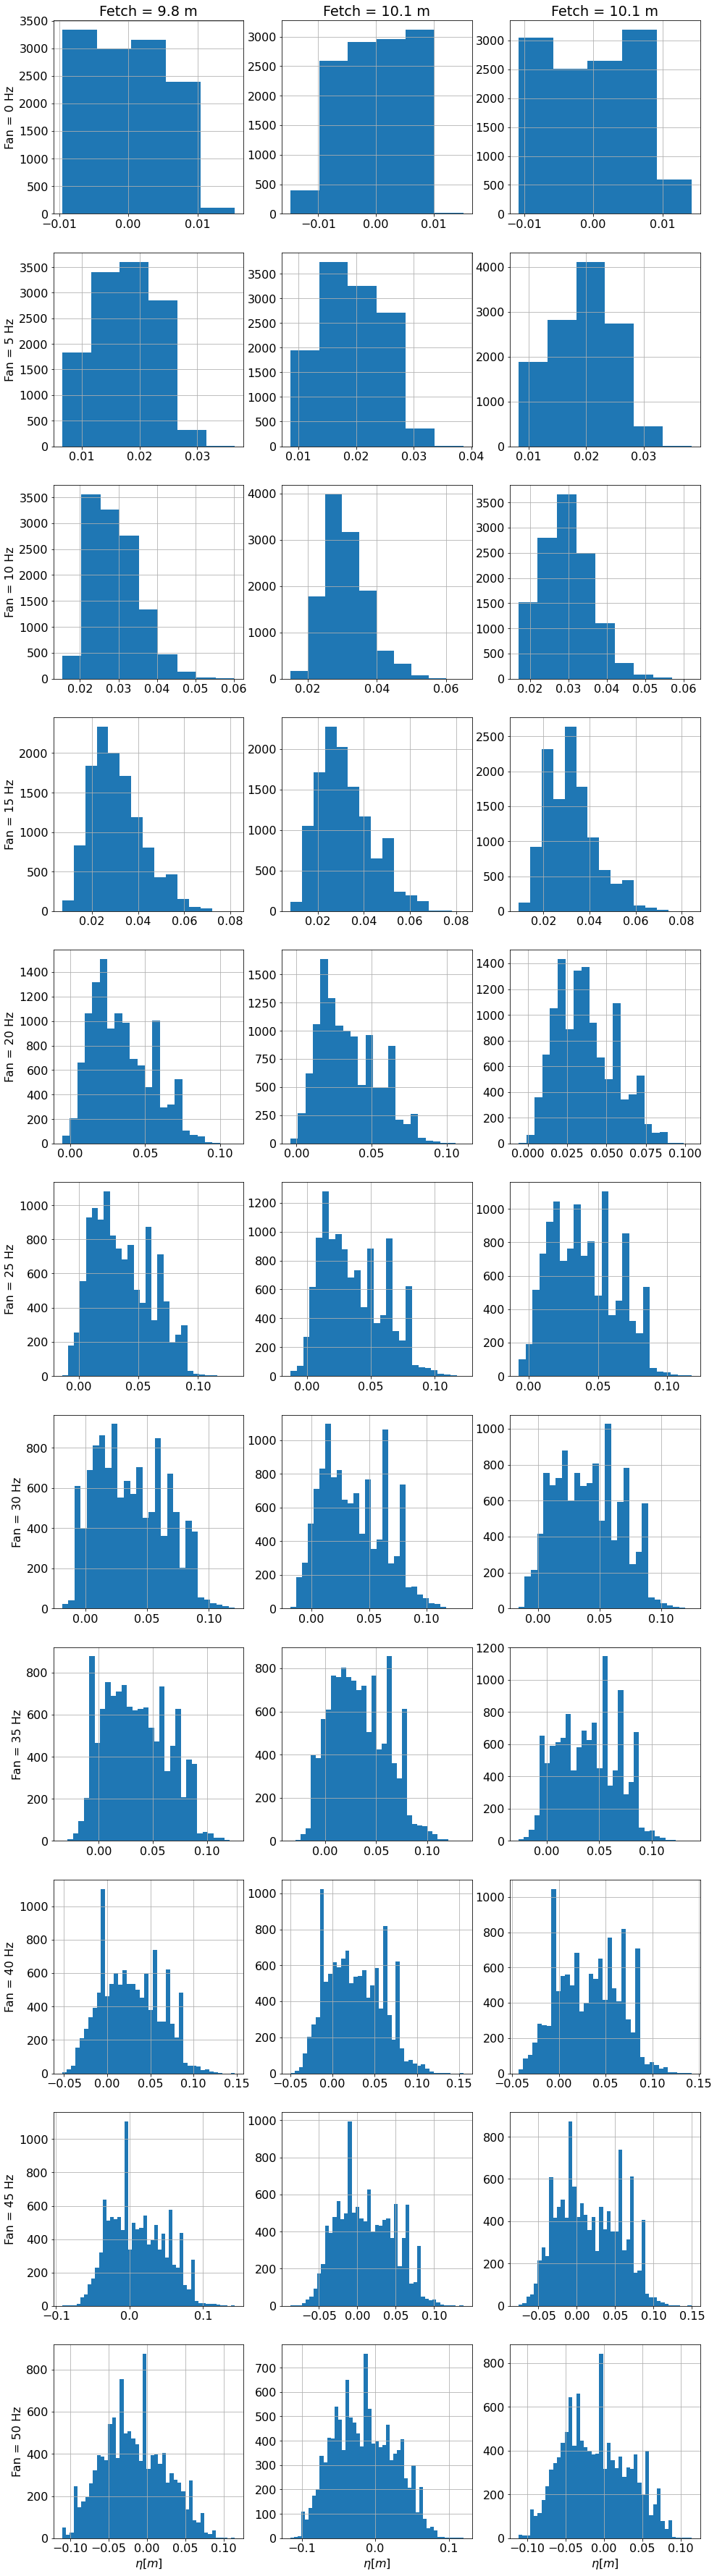

In [9]:
fan = np.arange(0, 55, 5)
num_runs = fan.size

ds = ds2
num_wires = ds.eta_w.shape[0]

fig = plt.figure(figsize=(16, 64))

for n, f in enumerate(fan):
    mask = ds.fan == f
    for i in range(num_wires):
        ax = plt.subplot2grid((num_runs, num_wires), (n, i))
        e = ds.eta_w[i,mask]
        bins = np.arange(np.min(e), np.max(e) + 5e-3, 5e-3)
        ax.hist(e, bins)
        ax.grid()
        if n == 0:
            ax.set_title('Fetch = %.1f m' % ds.fetch_wavewire[i])
        if i == 0:
            ax.set_ylabel('Fan = %i Hz' % f)
        if n == num_runs - 1:
            ax.set_xlabel(r'$\eta [m]$')

## 2020-11-06

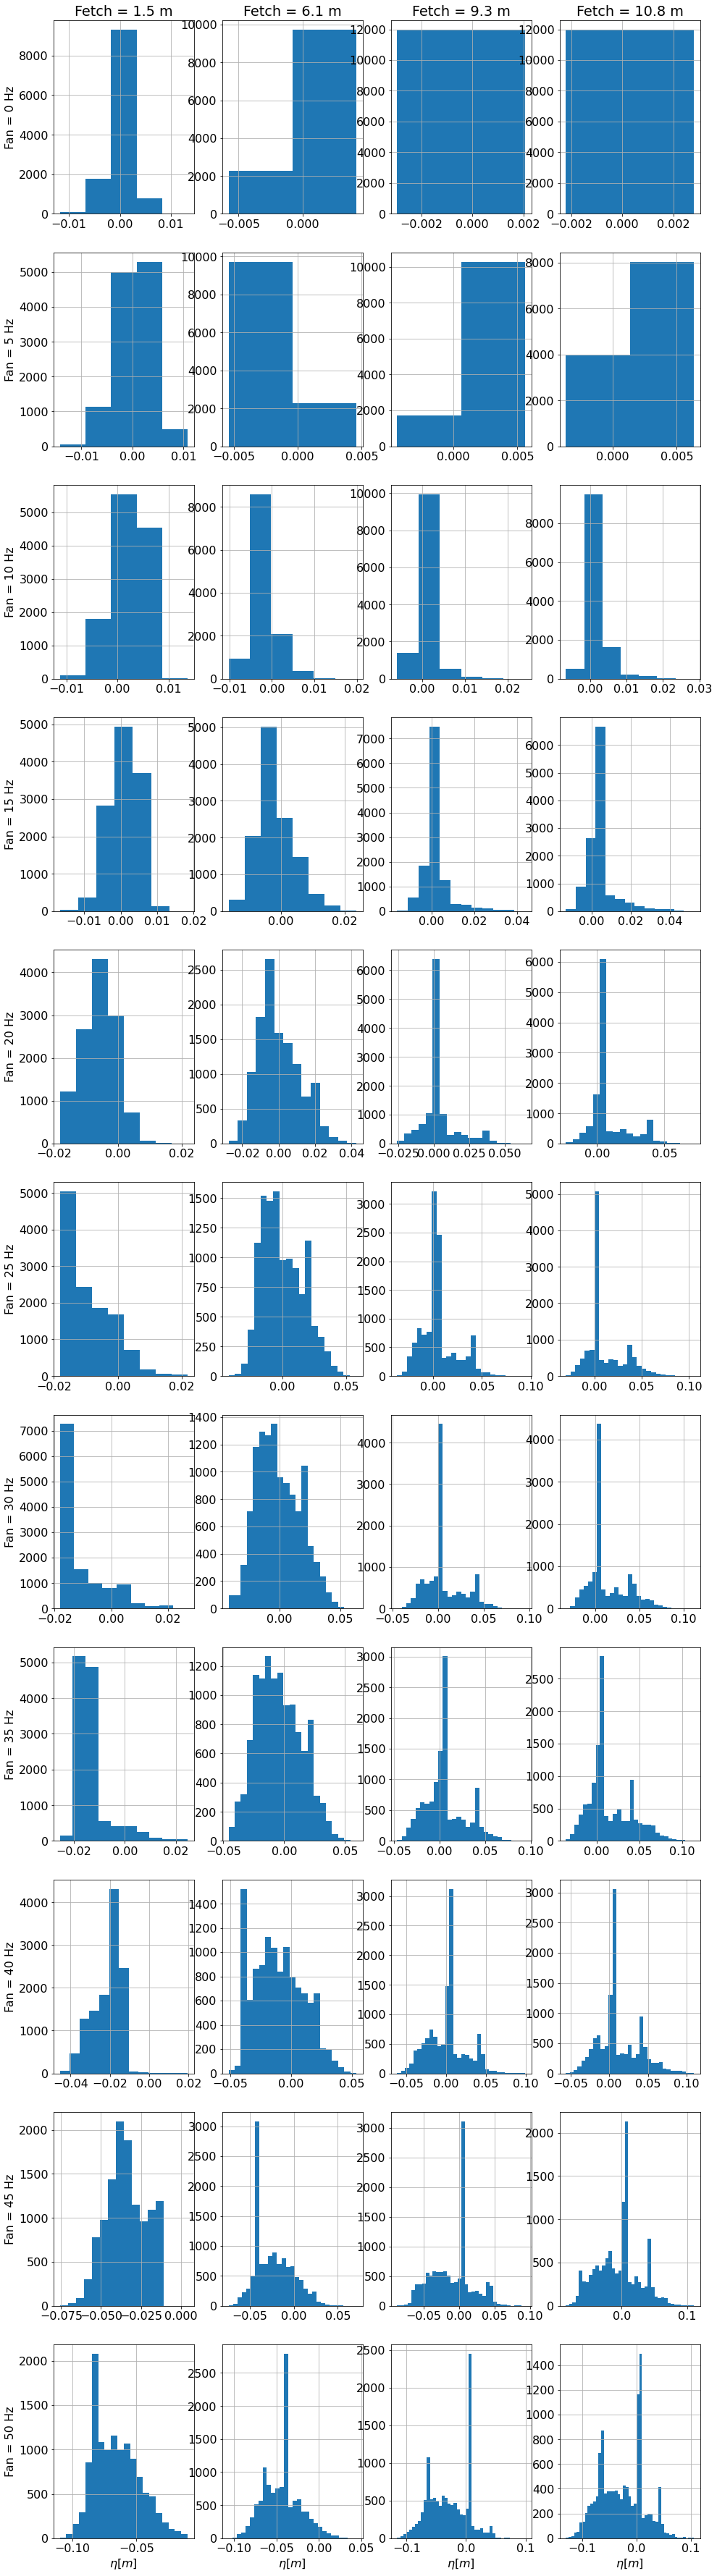

In [10]:
fan = np.arange(0, 55, 5)
num_runs = fan.size

ds = ds3
num_wires = ds.eta_w.shape[0]

fig = plt.figure(figsize=(16, 64))

for n, f in enumerate(fan):
    mask = ds.fan == f
    for i in range(num_wires):
        ax = plt.subplot2grid((num_runs, num_wires), (n, i))
        e = ds.eta_w[i,mask]
        bins = np.arange(np.min(e), np.max(e) + 5e-3, 5e-3)
        ax.hist(e, bins)
        ax.grid()
        if n == 0:
            ax.set_title('Fetch = %.1f m' % ds.fetch_wavewire[i])
        if i == 0:
            ax.set_ylabel('Fan = %i Hz' % f)
        if n == num_runs - 1:
            ax.set_xlabel(r'$\eta [m]$')

## 2020-11-18

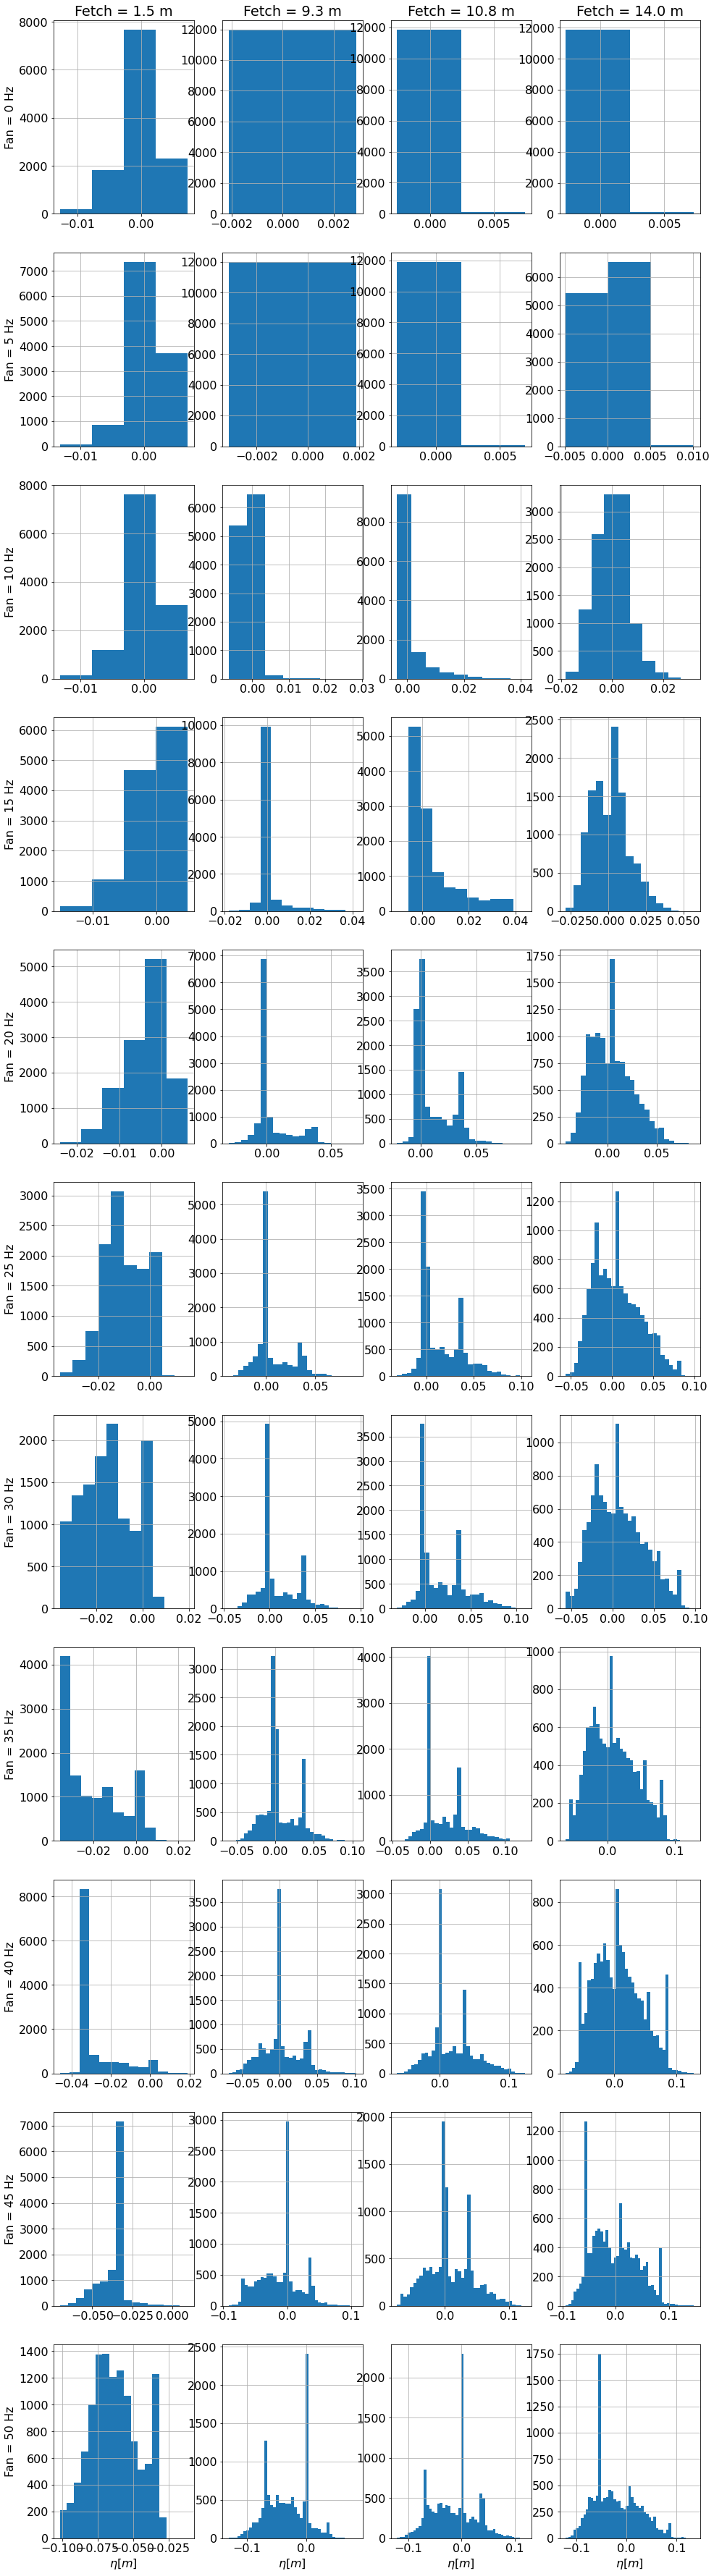

In [11]:
fan = np.arange(0, 55, 5)
num_runs = fan.size

ds = ds4
num_wires = ds.eta_w.shape[0]

fig = plt.figure(figsize=(16, 64))

for n, f in enumerate(fan):
    mask = ds.fan == f
    for i in range(num_wires):
        ax = plt.subplot2grid((num_runs, num_wires), (n, i))
        e = ds.eta_w[i,mask]
        bins = np.arange(np.min(e), np.max(e) + 5e-3, 5e-3)
        ax.hist(e, bins)
        ax.grid()
        if n == 0:
            ax.set_title('Fetch = %.1f m' % ds.fetch_wavewire[i])
        if i == 0:
            ax.set_ylabel('Fan = %i Hz' % f)
        if n == num_runs - 1:
            ax.set_xlabel(r'$\eta [m]$')

## 2020-11-18, JONSWAP (Tp = 1 s, Hs = 0.1 m)

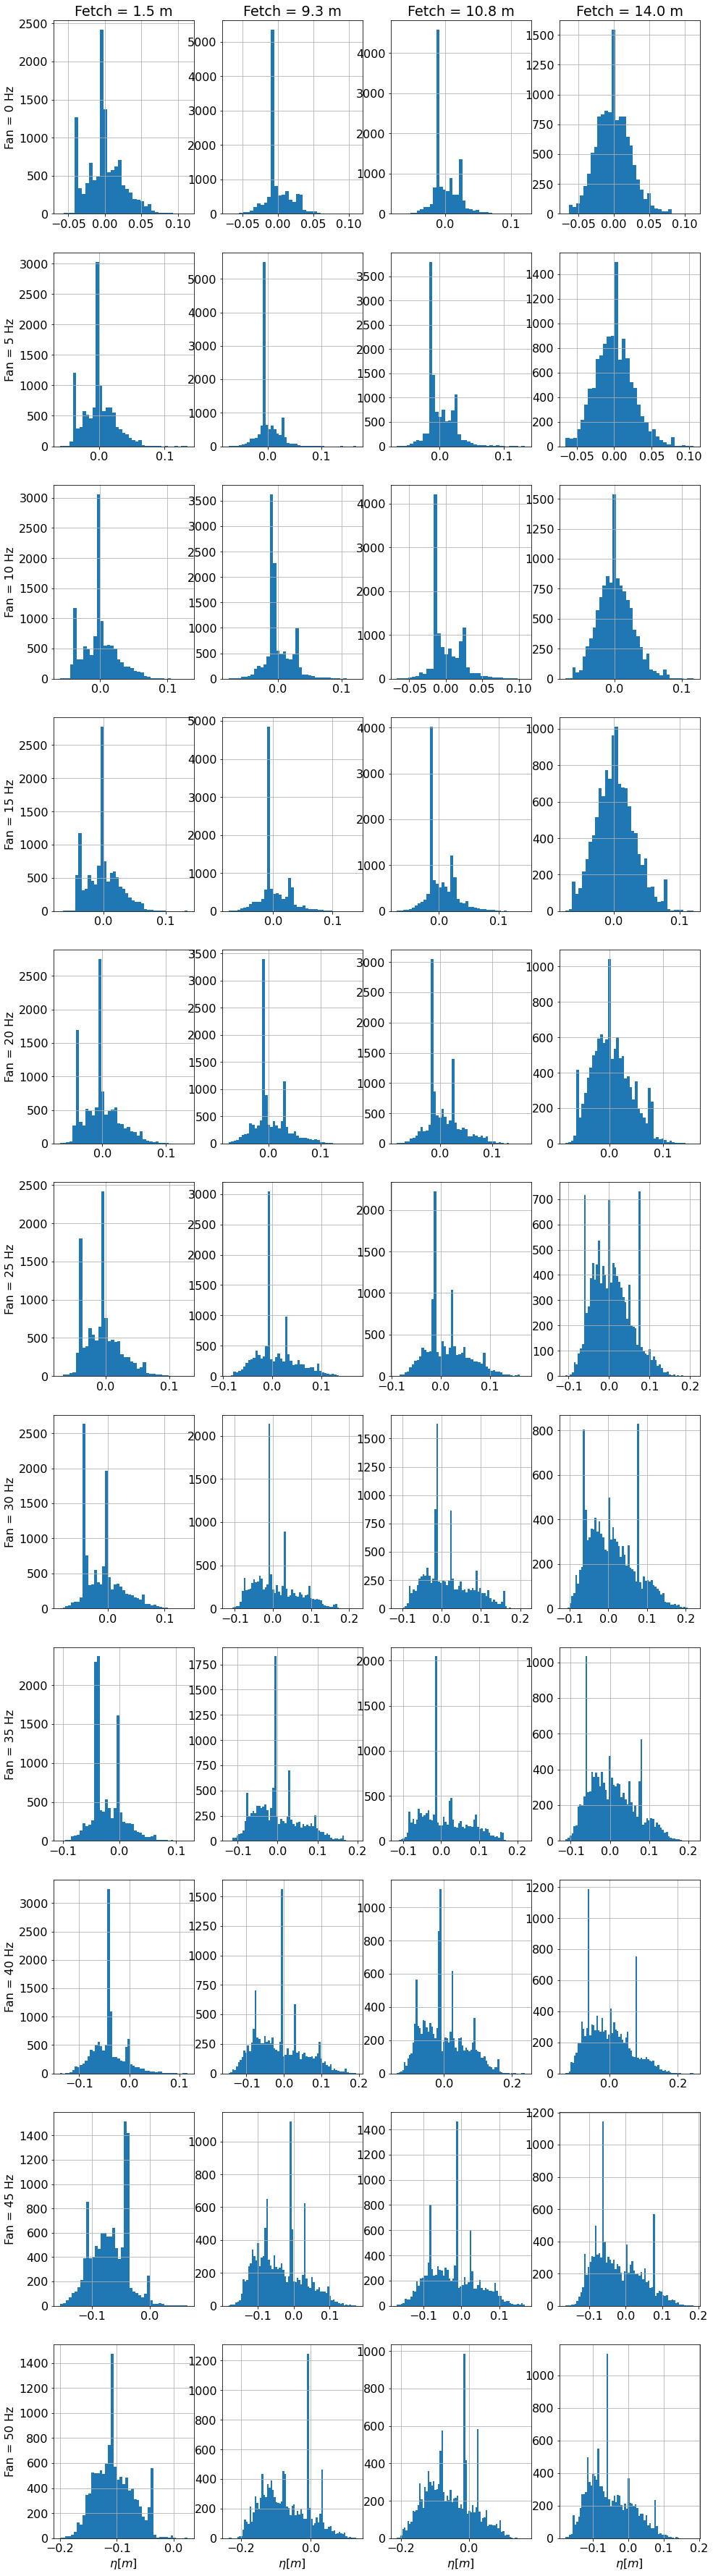

In [12]:
fan = np.arange(0, 55, 5)
num_runs = fan.size

ds = ds5
num_wires = ds.eta_w.shape[0]

fig = plt.figure(figsize=(16, 64))

for n, f in enumerate(fan):
    mask = ds.fan == f
    for i in range(num_wires):
        ax = plt.subplot2grid((num_runs, num_wires), (n, i))
        e = ds.eta_w[i,mask]
        bins = np.arange(np.min(e), np.max(e) + 5e-3, 5e-3)
        ax.hist(e, bins)
        ax.grid()
        if n == 0:
            ax.set_title('Fetch = %.1f m' % ds.fetch_wavewire[i])
        if i == 0:
            ax.set_ylabel('Fan = %i Hz' % f)
        if n == num_runs - 1:
            ax.set_xlabel(r'$\eta [m]$')